## STUDENT ID:  147e6a283601f000

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/energydata_complete.csv')

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## QUESTION 12
* From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

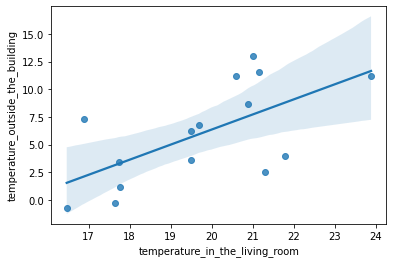

In [ ]:
column_names = {'T2':'temperature_in_the_living_room', 'T6':'temperature_outside_the_building'}

df = df.rename(columns = column_names)
reg_df = df[['temperature_in_the_living_room', 'temperature_outside_the_building']].sample(15, random_state = 42)
sns.regplot(x='temperature_in_the_living_room',y='temperature_outside_the_building', data = reg_df)

In [ ]:
# dropping the date column
df1=df.drop(['date'],axis=1, inplace=False)

In [ ]:
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df1),columns= df1.columns)

In [ ]:
normalized_df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [ ]:
feature_columns= normalized_df.drop(['T6'],axis =1, inplace=False)
target=normalized_df['T6']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(feature_columns,target,test_size=0.3, random_state=2)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
predicted_value = reg.predict(x_test)

In [ ]:
predicted_value

array([0.11199566, 0.60189045, 0.48433949, ..., 0.46407377, 0.46404378,
       0.70546316])

In [ ]:
# model tuning using R-squared method
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, predicted_value)

In [ ]:
# rounding up to 2 decimal points
round(r2,2)

0.97

## QUESTION 13
* Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
# dropping the date and light columns
df2 = df.drop(['date','lights'],axis=1, inplace = False)

In [ ]:
df2.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df2),columns= df2.columns)

In [ ]:
x = normalized_df.drop(['Appliances'],axis=1,inplace=False)
# y = normalized_df.Appliances

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
reg_1 = LinearRegression()
reg_1.fit(x_train,y_train)

LinearRegression()

In [ ]:
predicted = reg_1.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae= mean_absolute_error(y_test, predicted)

In [ ]:
# rounding the mean absolye error in 2 decimal places
round(mae,2)

0.05

## QUESTION 14
What is the Residual Sum of Squares (in two decimal places)?

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rss = np.sum(np.square(y_test - predicted))

In [ ]:
round(rss,2)

44.37

## QUESTION 15
What is the Root Mean Squared Error (in three decimal places)?

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,predicted))

In [ ]:
round(rmse,3)

0.085

## QUESTION 16
* What is the Coefficient of Determination (in two decimal places)?

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score = r2_score(y_test,predicted)

In [ ]:
predicted

array([0.03188164, 0.23442182, 0.03315887, ..., 0.06482715, 0.14787597,
       0.05335882])

In [ ]:
round(r2_score,2)

0.17

## QUESTION 17
* Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [ ]:
#comparing effects of regularisation
def get_weights_df(model, feat, col_name):
    #returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
model_weights = get_weights_df(reg_1, x_train,'Model_Weight')
model_weights

,Features,Model_Weight
0,RH_2,-0.425037
1,T_out,-0.305942
2,T2,-0.203519
3,T9,-0.129547
4,RH_8,-0.123726
5,RH_out,-0.087518
6,T4,-0.039769
7,RH_7,-0.036779
8,RH_9,-0.026970
9,RH_4,-0.019861


* RH_2 had the lowest weight
* RH_1 had the highest weight

## QUESTION 18
* Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
reg_ridge = Ridge(alpha=0.4)
reg_ridge.fit(x_train,y_train)

Ridge(alpha=0.4)

In [ ]:
predict = reg_ridge.predict(x_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,predict))

In [ ]:
round(rmse,2)

0.09

## Question 19
* Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
reg_lasso = Lasso(alpha=0.001)
reg_lasso.fit(x_train,y_train)

Lasso(alpha=0.001)

In [ ]:
predict=reg_lasso.predict(x_test)

In [ ]:
lasso_weights_df = get_weights_df(reg_lasso, x_train, 'Lasso_weight')

In [ ]:
lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.052519
1,T7,-0.000000
2,Tdewpoint,0.000000
3,Visibility,0.000000
4,Windspeed,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,RH_8,-0.000000


## QUESTION 20
What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test, predict))

In [ ]:
round(rmse,3)

0.092